<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Before-your-start:" data-toc-modified-id="Before-your-start:-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Before your start:</a></span></li><li><span><a href="#Challenge-1---Import-and-Describe-the-Dataset" data-toc-modified-id="Challenge-1---Import-and-Describe-the-Dataset-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Challenge 1 - Import and Describe the Dataset</a></span><ul class="toc-item"><li><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#Explore-the-dataset-with-mathematical-and-visualization-techniques.-What-do-you-find?" data-toc-modified-id="Explore-the-dataset-with-mathematical-and-visualization-techniques.-What-do-you-find?-2.0.0.1"><span class="toc-item-num">2.0.0.1&nbsp;&nbsp;</span>Explore the dataset with mathematical and visualization techniques. What do you find?</a></span></li></ul></li></ul></li></ul></li><li><span><a href="#Challenge-2---Data-Cleaning-and-Transformation" data-toc-modified-id="Challenge-2---Data-Cleaning-and-Transformation-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Challenge 2 - Data Cleaning and Transformation</a></span></li><li><span><a href="#Challenge-3---Data-Preprocessing" data-toc-modified-id="Challenge-3---Data-Preprocessing-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Challenge 3 - Data Preprocessing</a></span><ul class="toc-item"><li><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#We-will-use-the-StandardScaler-from-sklearn.preprocessing-and-scale-our-data.-Read-more-about-StandardScaler-here." data-toc-modified-id="We-will-use-the-StandardScaler-from-sklearn.preprocessing-and-scale-our-data.-Read-more-about-StandardScaler-here.-4.0.0.1"><span class="toc-item-num">4.0.0.1&nbsp;&nbsp;</span>We will use the <code>StandardScaler</code> from <code>sklearn.preprocessing</code> and scale our data. Read more about <code>StandardScaler</code> <a href="https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html#sklearn.preprocessing.StandardScaler" target="_blank">here</a>.</a></span></li></ul></li></ul></li></ul></li><li><span><a href="#Challenge-4---Data-Clustering-with-K-Means" data-toc-modified-id="Challenge-4---Data-Clustering-with-K-Means-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Challenge 4 - Data Clustering with K-Means</a></span></li><li><span><a href="#Challenge-5---Data-Clustering-with-DBSCAN" data-toc-modified-id="Challenge-5---Data-Clustering-with-DBSCAN-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Challenge 5 - Data Clustering with DBSCAN</a></span></li><li><span><a href="#Challenge-6---Compare-K-Means-with-DBSCAN" data-toc-modified-id="Challenge-6---Compare-K-Means-with-DBSCAN-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Challenge 6 - Compare K-Means with DBSCAN</a></span></li><li><span><a href="#Bonus-Challenge-2---Changing-K-Means-Number-of-Clusters" data-toc-modified-id="Bonus-Challenge-2---Changing-K-Means-Number-of-Clusters-8"><span class="toc-item-num">8&nbsp;&nbsp;</span>Bonus Challenge 2 - Changing K-Means Number of Clusters</a></span></li><li><span><a href="#Bonus-Challenge-3---Changing-DBSCAN-eps-and-min_samples" data-toc-modified-id="Bonus-Challenge-3---Changing-DBSCAN-eps-and-min_samples-9"><span class="toc-item-num">9&nbsp;&nbsp;</span>Bonus Challenge 3 - Changing DBSCAN <code>eps</code> and <code>min_samples</code></a></span></li></ul></div>

# Before your start:
- Read the README.md file
- Comment as much as you can and use the resources in the README.md file
- Happy learning!

In [14]:
# Import your libraries:

%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import warnings                                              
from sklearn.exceptions import DataConversionWarning          
warnings.filterwarnings(action='ignore', category=DataConversionWarning)

# Challenge 1 - Import and Describe the Dataset

In this lab, we will use a dataset containing information about customer preferences. We will look at how much each customer spends in a year on each subcategory in the grocery store and try to find similarities using clustering.

The origin of the dataset is [here](https://archive.ics.uci.edu/ml/datasets/wholesale+customers).

In [15]:
# Load the Wholesale Customers dataset directly from UCI
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/00292/Wholesale%20customers%20data.csv"

data = pd.read_csv(url)

In [16]:
# Preview the dataset
print("Shape:", data.shape)
data.head()

Shape: (440, 8)


,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


#### Explore the dataset with mathematical and visualization techniques. What do you find?

Checklist:

* What does each column mean?
* Any categorical data to convert?
* Any missing data to remove?
* Column collinearity - any high correlations?
* Descriptive statistics - any outliers to remove?
* Column-wise data distribution - is the distribution skewed?
* Etc.

Additional info: Over a century ago, an Italian economist named Vilfredo Pareto discovered that roughly 20% of the customers account for 80% of the typical retail sales. This is called the [Pareto principle](https://en.wikipedia.org/wiki/Pareto_principle). Check if this dataset displays this characteristic.

In [17]:
# Your code here:
data.describe()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,1.322727,2.543182,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,0.468052,0.774272,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,1.000000,1.000000,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,1.000000,2.000000,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,1.000000,3.000000,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,2.000000,3.000000,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,2.000000,3.000000,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


In [18]:
data.Frozen

0        214
1       1762
2       2405
3       6404
4       3915
       ...  
435    13135
436     4510
437      437
438     1038
439       65
Name: Frozen, Length: 440, dtype: int64

In [19]:
data.describe

<bound method NDFrame.describe of      Channel  Region  Fresh   Milk  Grocery  Frozen  Detergents_Paper  \
0          2       3  12669   9656     7561     214              2674   
1          2       3   7057   9810     9568    1762              3293   
2          2       3   6353   8808     7684    2405              3516   
3          1       3  13265   1196     4221    6404               507   
4          2       3  22615   5410     7198    3915              1777   
..       ...     ...    ...    ...      ...     ...               ...   
435        1       3  29703  12051    16027   13135               182   
436        1       3  39228   1431      764    4510                93   
437        2       3  14531  15488    30243     437             14841   
438        1       3  10290   1981     2232    1038               168   
439        1       3   2787   1698     2510      65               477   

     Delicassen  
0          1338  
1          1776  
2          7844  
3          1788  

**Your observations here**

- ex.: Frozen, Grocery, Milk and Detergents Paper have a high...
- ...



# Challenge 2 - Data Cleaning and Transformation

If your conclusion from the previous challenge is the data need cleaning/transformation, do it in the cells below. However, if your conclusion is the data need not be cleaned or transformed, feel free to skip this challenge. But if you do choose the latter, please provide rationale.

In [20]:
# Your code here
data.isnull().sum()


Channel             0
Region              0
Fresh               0
Milk                0
Grocery             0
Frozen              0
Detergents_Paper    0
Delicassen          0
dtype: int64

**Your comment here**

-  ...
-  ...

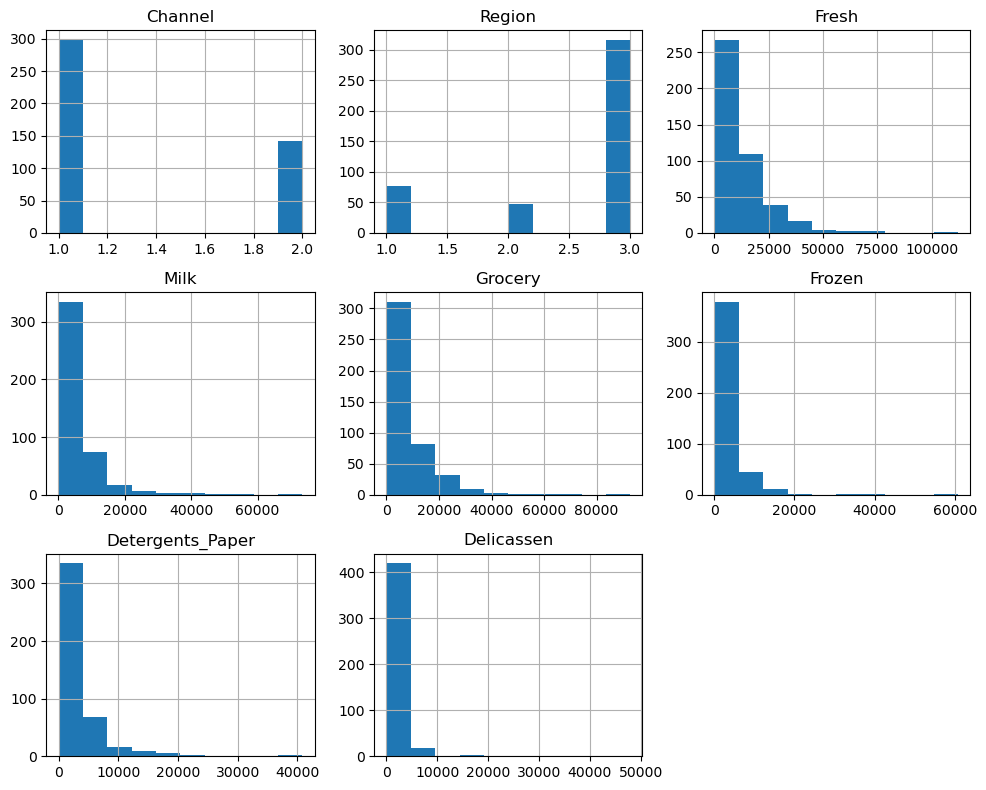

In [21]:
data.hist(figsize=(10,8))
plt.tight_layout()
plt.show()

In [29]:
X = data.drop(['Channel', 'Region'], axis=1)

# Challenge 3 - Data Preprocessing

One problem with the dataset is the value ranges are remarkably different across various categories (e.g. `Fresh` and `Grocery` compared to `Detergents_Paper` and `Delicassen`). If you made this observation in the first challenge, you've done a great job! This means you not only completed the bonus questions in the previous Supervised Learning lab but also researched deep into [*feature scaling*](https://en.wikipedia.org/wiki/Feature_scaling). Keep on the good work!

Diverse value ranges in different features could cause issues in our clustering. The way to reduce the problem is through feature scaling. We'll use this technique again with this dataset.

#### We will use the `StandardScaler` from `sklearn.preprocessing` and scale our data. Read more about `StandardScaler` [here](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html#sklearn.preprocessing.StandardScaler).

*After scaling your data, assign the transformed data to a new variable `customers_scale`.*

In [30]:
# Your import here:

from sklearn.preprocessing import StandardScaler

# Your code here:
from sklearn.preprocessing import StandardScaler

# Create the scaler
scaler = StandardScaler()

# Fit and transform the numeric data
customers_scale = scaler.fit_transform(X)



In [31]:
customers_scale = pd.DataFrame(customers_scale, columns=X.columns)
customers_scale.describe().round(2)

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
count,440.00,440.00,440.00,440.00,440.00,440.00
mean,-0.00,0.00,-0.00,0.00,0.00,-0.00
std,1.00,1.00,1.00,1.00,1.00,1.00
min,-0.95,-0.78,-0.84,-0.63,-0.60,-0.54
25%,-0.70,-0.58,-0.61,-0.48,-0.55,-0.40
50%,-0.28,-0.29,-0.34,-0.32,-0.43,-0.20
75%,0.39,0.19,0.28,0.10,0.22,0.10
max,7.93,9.18,8.94,11.92,7.97,16.48


# Challenge 4 - Data Clustering with K-Means

Now let's cluster the data with K-Means first. Initiate the K-Means model, then fit your scaled data. In the data returned from the `.fit` method, there is an attribute called `labels_` which is the cluster number assigned to each data record. What you can do is to assign these labels back to `customers` in a new column called `customers['labels']`. Then you'll see the cluster results of the original data.

In [32]:
from sklearn.cluster import KMeans

# Your code here:
# Initialize the model
kmeans = KMeans(n_clusters=4, random_state=42)

### Looking to the elbow we can choose 2 like the correct number of clusters

In [33]:
kmeans_2 = KMeans(n_clusters=2).fit(customers_scale)

labels = kmeans_2.predict(customers_scale)

clusters = kmeans_2.labels_.tolist()

c:\Users\adria\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\adria\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


In [35]:
data['Label'] = clusters


In [34]:
clean_customers['Label'] = clusters

NameError: name 'clean_customers' is not defined

Count the values in `labels`.

In [36]:
# Your code here:
data['Label'].value_counts()


Label
0    398
1     42
Name: count, dtype: int64

# Challenge 5 - Data Clustering with DBSCAN

Now let's cluster the data using DBSCAN. Use `DBSCAN(eps=0.5)` to initiate the model, then fit your scaled data. In the data returned from the `.fit` method, assign the `labels_` back to `customers['labels_DBSCAN']`. Now your original data have two labels, one from K-Means and the other from DBSCAN.

In [37]:
from sklearn.cluster import DBSCAN 

# Your code here
dbscan = DBSCAN(eps=0.5)
dbscan.fit(customers_scale)



DBSCAN()

Count the values in `labels_DBSCAN`.

In [38]:
# Your code here
dbscan_labels = dbscan.labels_



In [40]:
import pandas as pd

pd.Series(dbscan_labels).value_counts()


 0    261
-1    174
 1      5
Name: count, dtype: int64

# Challenge 6 - Compare K-Means with DBSCAN

Now we want to visually compare how K-Means and DBSCAN have clustered our data. We will create scatter plots for several columns. For each of the following column pairs, plot a scatter plot using `labels` and another using `labels_DBSCAN`. Put them side by side to compare. Which clustering algorithm makes better sense?

Columns to visualize:

* `Detergents_Paper` as X and `Milk` as y
* `Grocery` as X and `Fresh` as y
* `Frozen` as X and `Delicassen` as y

Visualize `Detergents_Paper` as X and `Milk` as y by `labels` and `labels_DBSCAN` respectively

In [47]:
print(data.columns)


Index(['Channel', 'Region', 'Fresh', 'Milk', 'Grocery', 'Frozen',
       'Detergents_Paper', 'Delicassen', 'Label'],
      dtype='object')


In [48]:
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps=0.5)
dbscan.fit(customers_scale)

data['labels_DBSCAN'] = dbscan.labels_


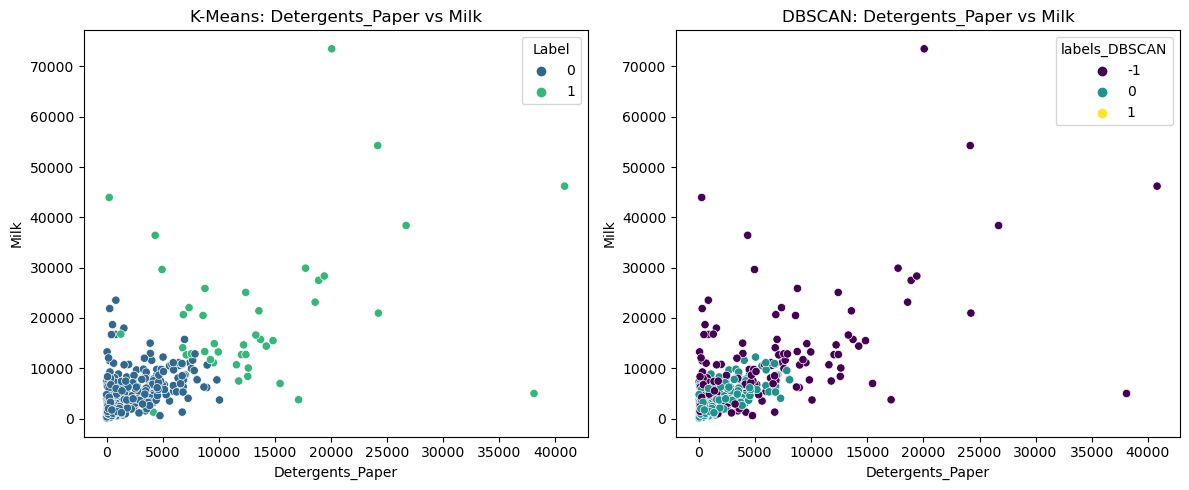

In [49]:
plt.figure(figsize=(12,5))

# K-Means
plt.subplot(1, 2, 1)
sns.scatterplot(data=data, x='Detergents_Paper', y='Milk', hue='Label', palette='viridis')
plt.title('K-Means: Detergents_Paper vs Milk')

# DBSCAN
plt.subplot(1, 2, 2)
sns.scatterplot(data=data, x='Detergents_Paper', y='Milk', hue='labels_DBSCAN', palette='viridis')
plt.title('DBSCAN: Detergents_Paper vs Milk')

plt.tight_layout()
plt.show()


Visualize `Grocery` as X and `Fresh` as y by `labels` and `labels_DBSCAN` respectively

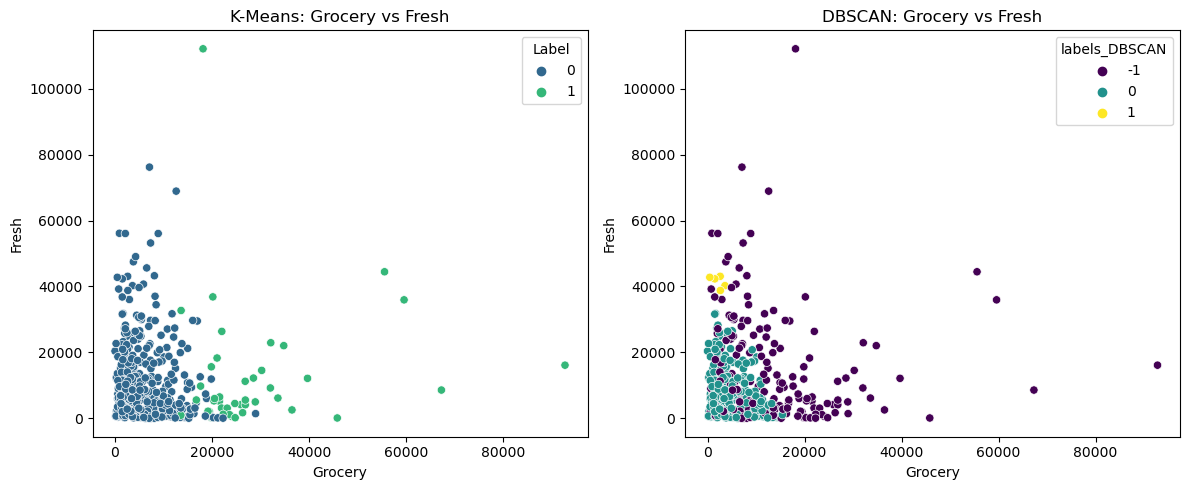

In [50]:
# Your code here:
plt.figure(figsize=(12,5))

# ---- K-Means ----
plt.subplot(1, 2, 1)
sns.scatterplot(data=data, x='Grocery', y='Fresh', hue='Label', palette='viridis')
plt.title('K-Means: Grocery vs Fresh')
plt.xlabel('Grocery')
plt.ylabel('Fresh')

# ---- DBSCAN ----
plt.subplot(1, 2, 2)
sns.scatterplot(data=data, x='Grocery', y='Fresh', hue='labels_DBSCAN', palette='viridis')
plt.title('DBSCAN: Grocery vs Fresh')
plt.xlabel('Grocery')
plt.ylabel('Fresh')

plt.tight_layout()
plt.show()


Visualize `Frozen` as X and `Delicassen` as y by `labels` and `labels_DBSCAN` respectively

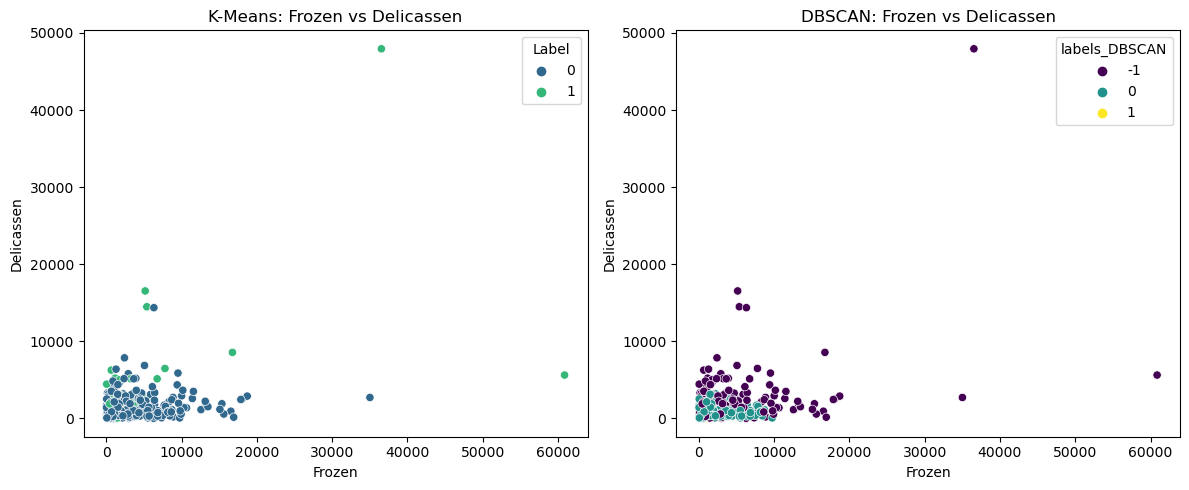

In [55]:
# Your code here:
plt.figure(figsize=(12,5))

# ---- K-Means ----
plt.subplot(1, 2, 1)
sns.scatterplot(data=data, x='Frozen', y='Delicassen', hue='Label', palette='viridis')
plt.title('K-Means: Frozen vs Delicassen')
plt.xlabel('Frozen')
plt.ylabel('Delicassen')

# ---- DBSCAN ----
plt.subplot(1, 2, 2)
sns.scatterplot(data=data, x='Frozen', y='Delicassen', hue='labels_DBSCAN', palette='viridis')
plt.title('DBSCAN: Frozen vs Delicassen')
plt.xlabel('Frozen')
plt.ylabel('Delicassen')

plt.tight_layout()
plt.show()


Let's use a groupby to see how the mean differs between the groups. Group `customers` by `labels` and `labels_DBSCAN` respectively and compute the means for all columns.

In [56]:
# Your code here:
kmeans_means = data.groupby('Label').mean().round(2)
kmeans_means


,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,labels_DBSCAN
Label,,,,,,,,,
0,1.26,2.55,11915.65,4236.94,5724.79,2905.02,1768.94,1258.78,-0.32
1,1.90,2.45,12802.40,20572.69,29049.88,4653.64,13424.21,4046.40,-1.00


In [57]:
dbscan_means = data.groupby('labels_DBSCAN').mean().round(2)
dbscan_means


,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,Label
labels_DBSCAN,,,,,,,,,
-1,1.52,2.55,15608.99,10000.41,13693.30,4786.28,5291.37,2510.78,0.24
0,1.20,2.53,9030.40,3077.32,4234.06,1963.43,1322.13,881.77,0.00
1,1.00,3.00,41446.60,1421.20,2167.60,1276.40,416.20,784.80,0.00


In [58]:
print("K-Means cluster means:")
display(kmeans_means)

print("\nDBSCAN cluster means:")
display(dbscan_means)


K-Means cluster means:


,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,labels_DBSCAN
Label,,,,,,,,,
0,1.26,2.55,11915.65,4236.94,5724.79,2905.02,1768.94,1258.78,-0.32
1,1.90,2.45,12802.40,20572.69,29049.88,4653.64,13424.21,4046.40,-1.00



DBSCAN cluster means:


,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,Label
labels_DBSCAN,,,,,,,,,
-1,1.52,2.55,15608.99,10000.41,13693.30,4786.28,5291.37,2510.78,0.24
0,1.20,2.53,9030.40,3077.32,4234.06,1963.43,1322.13,881.77,0.00
1,1.00,3.00,41446.60,1421.20,2167.60,1276.40,416.20,784.80,0.00


Which algorithm appears to perform better?

**Your observations here**

- K-Means works very well with this kind of data.

- DBSCAN is designed for datasets with non-spherical clusters or lots of noise — like spatial or irregular density data — which is not the case here.

# Bonus Challenge 2 - Changing K-Means Number of Clusters

As we mentioned earlier, we don't need to worry about the number of clusters with DBSCAN because it automatically decides that based on the parameters we send to it. But with K-Means, we have to supply the `n_clusters` param (if you don't supply `n_clusters`, the algorithm will use `8` by default). You need to know that the optimal number of clusters differs case by case based on the dataset. K-Means can perform badly if the wrong number of clusters is used.

In advanced machine learning, data scientists try different numbers of clusters and evaluate the results with statistical measures (read [here](https://en.wikipedia.org/wiki/Cluster_analysis#External_evaluation)). We are not using statistical measures today but we'll use our eyes instead. In the cells below, experiment with different number of clusters and visualize with scatter plots. What number of clusters seems to work best for K-Means?

c:\Users\adria\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\adria\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
c:\Users\adria\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\adria\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are

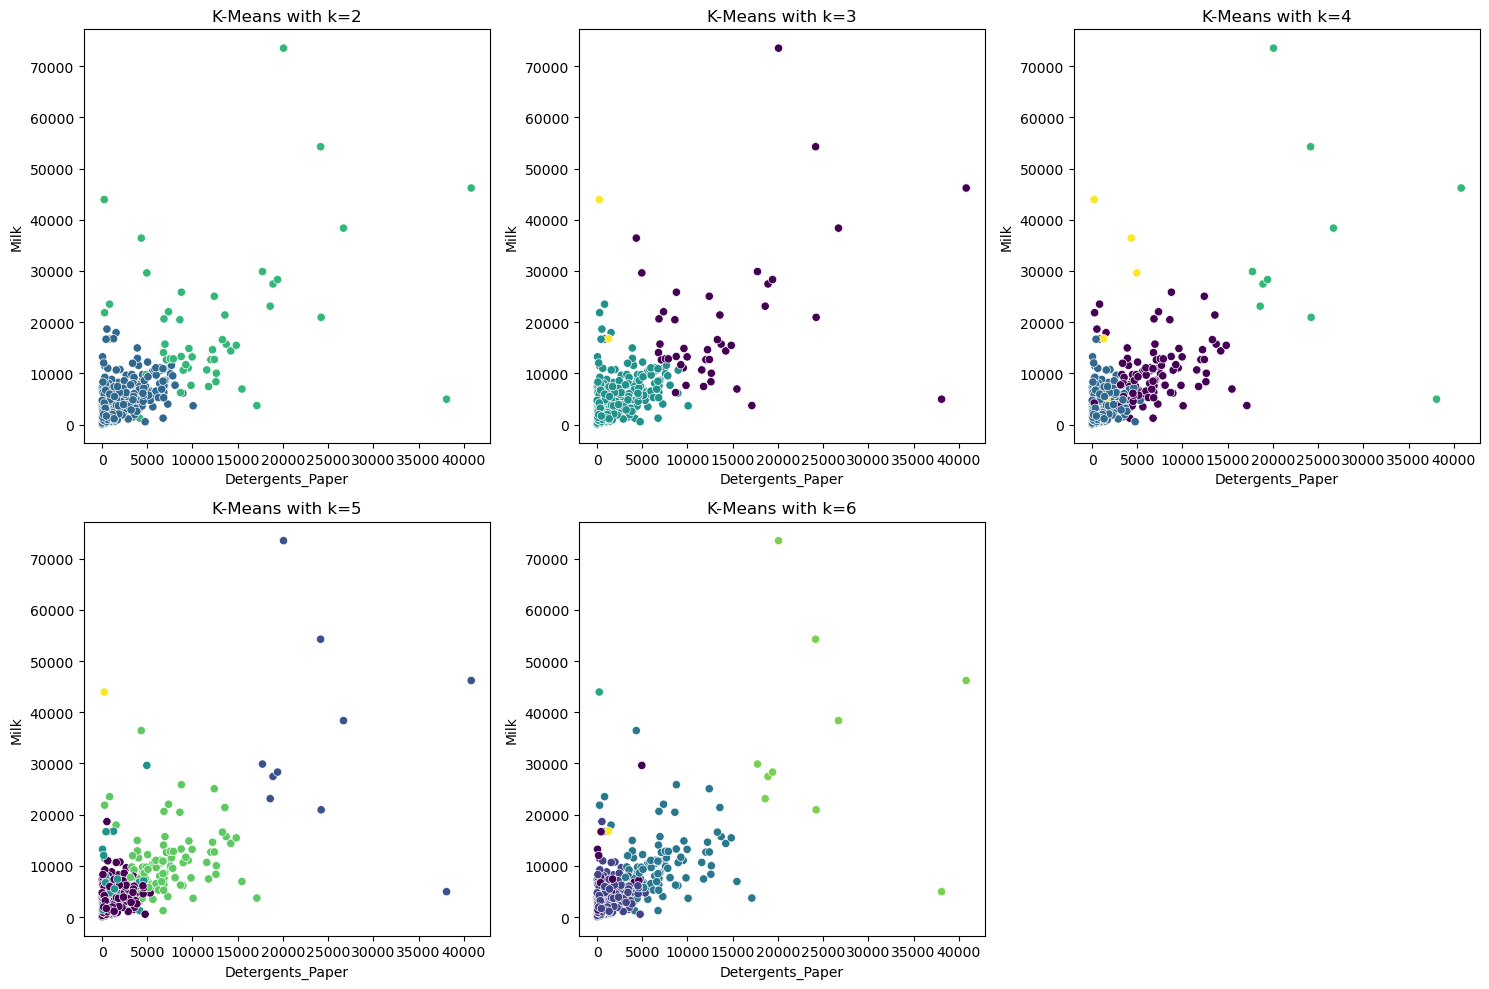

In [59]:
# Your code here:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(15,10))

for i, k in enumerate([2, 3, 4, 5, 6], 1):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(customers_scale)
    labels = kmeans.labels_

    plt.subplot(2, 3, i)
    sns.scatterplot(data=data, x='Detergents_Paper', y='Milk', hue=labels, palette='viridis')
    plt.title(f'K-Means with k={k}')
    plt.xlabel('Detergents_Paper')
    plt.ylabel('Milk')
    plt.legend([],[], frameon=False)

plt.tight_layout()
plt.show()


**Your comment here**

- As k increases, clusters become smaller and less meaningful.
With k = 2, the separation between low-spending and high-spending customers is clear and balanced.
Higher k values (3–6) only fragment the main cluster and do not reveal new useful patterns.
Best choice: k = 2

# Bonus Challenge 3 - Changing DBSCAN `eps` and `min_samples`

Experiment changing the `eps` and `min_samples` params for DBSCAN. See how the results differ with scatter plot visualization.

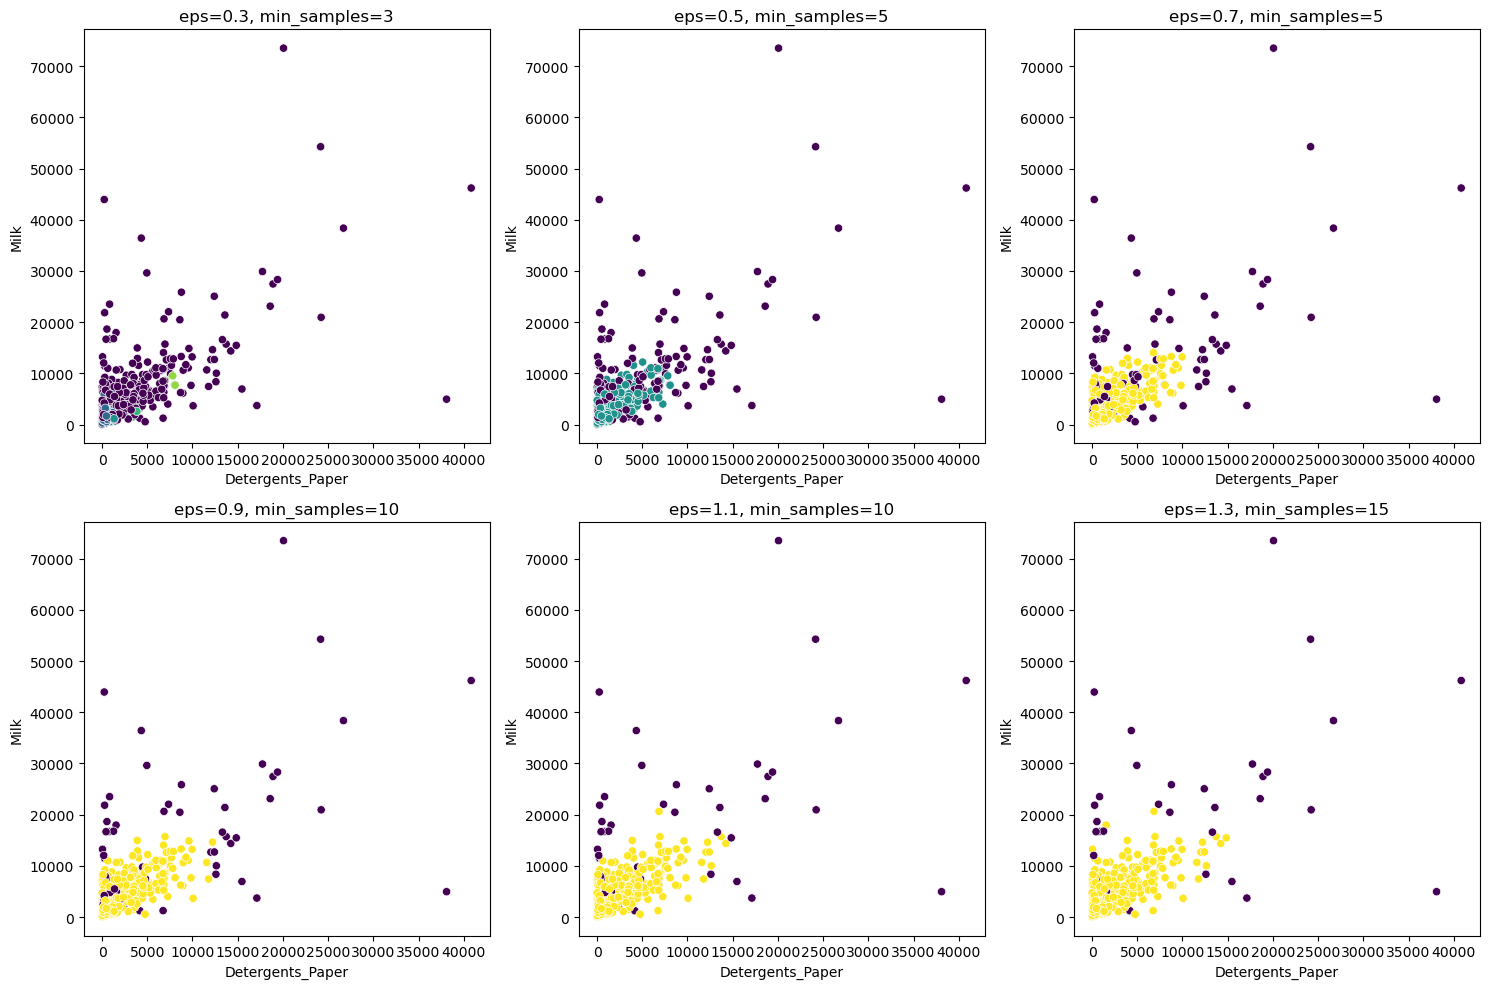

In [60]:
# Your code here
from sklearn.cluster import DBSCAN
import matplotlib.pyplot as plt
import seaborn as sns

params = [
    (0.3, 3),
    (0.5, 5),
    (0.7, 5),
    (0.9, 10),
    (1.1, 10),
    (1.3, 15)
]

plt.figure(figsize=(15,10))

for i, (eps, min_samples) in enumerate(params, 1):
    dbscan = DBSCAN(eps=eps, min_samples=min_samples)
    dbscan.fit(customers_scale)
    labels = dbscan.labels_

    plt.subplot(2, 3, i)
    sns.scatterplot(data=data, x='Detergents_Paper', y='Milk', hue=labels, palette='viridis', legend=False)
    plt.title(f'eps={eps}, min_samples={min_samples}')
    plt.xlabel('Detergents_Paper')
    plt.ylabel('Milk')

plt.tight_layout()
plt.show()


**Your comment here**

- When eps is too small (0.3–0.5), most points are labeled as noise (purple).
As eps increases (0.7–1.1), clusters begin to merge and noise decreases.
At very high eps (≥ 1.3), almost all points fall into one big cluster, losing structure.
Best balance: eps ≈ 0.9 – 1.0 and min_samples ≈ 5 – 10.